In [71]:
# Read Excel for indices and case numbers 
excel_file_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/T7-Summary(LocalOld).xlsx'

In [ ]:
# Get indicies and case number sfrom excel sheet
import pandas as pd
excel_file_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/T7-Summary(LocalOld).xlsx'
# Replace 'your_file.xlsx' with the actual path to your Excel file
# Read the Excel file
data = pd.read_excel(excel_file_path, skiprows=[0])

# Define the indices for the columns you're interested in (0-based indexing)
column2_index = 1  # Replace with the correct index for column 2
column3_index = 2  # Replace with the correct index for column 3

# Filter out rows where column 3 has a value but column 2 is blank
filtered_data = data[data.iloc[:, column2_index].notna() | data.iloc[:, column3_index].isna()]

# Extract the second and third columns from the filtered data and convert them to lists
second_column = filtered_data.iloc[:, column2_index].tolist()
third_column = filtered_data.iloc[:, column3_index].tolist()

# Remove 'NaN' values from the lists
indices = [int(value) for value in second_column if not pd.isna(value)]
case_numbers = [int(value) for value in third_column if not pd.isna(value)]

print("Index:", indices)
print("Case:", case_numbers)


In [ ]:
# 100 YES WORKING TO FIND ALL THREE FILES CONTAINED WITHIN THE subdirectory 1-DONE
import os
import pandas as pd

excel_file_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/T7-Summary(LocalOld).xlsx'
# Read the Excel file
data = pd.read_excel(excel_file_path, skiprows=[0])

# Define the indices for the columns you're interested in (0-based indexing)
column2_index = 1  # Replace with the correct index for column 2
column3_index = 2  # Replace with the correct index for column 3

# Filter out rows where column 3 has a value but column 2 is blank
filtered_data = data[data.iloc[:, column2_index].notna() | data.iloc[:, column3_index].isna()]

# Extract the second and third columns from the filtered data and convert them to lists
second_column = filtered_data.iloc[:, column2_index].tolist()
third_column = filtered_data.iloc[:, column3_index].tolist()

# Remove 'NaN' values from the lists
indices = [int(value) for value in second_column if not pd.isna(value)]
case_numbers = [int(value) for value in third_column if not pd.isna(value)]

def find_files(folder_path):
    vx3_file = None
    mask_file = None
    label_file = None
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file == "Vx3.nrrd":
                vx3_file = os.path.join(root, file)
            elif file.endswith(".mask.nii.gz"):
                mask_file = os.path.join(root, file)
            elif file.endswith("label.nrrd"):
                label_file = os.path.join(root, file)
        
        if vx3_file and mask_file and label_file:
            break  # All files are found, exit the loop
    
    return vx3_file, mask_file, label_file

base_folder = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/"

for case_number in case_numbers:
    case_folder_prefix = f"Case-{case_number}-"
    
    for folder in os.listdir(base_folder):
        if folder.startswith(case_folder_prefix):
            folder_path = os.path.join(base_folder, folder)
            vx3_file, mask_file, label_file = find_files(folder_path)

            if vx3_file and mask_file and label_file:
                print("All files were found for", folder)
                print("Vx3 File:", vx3_file)
                print("Mask File:", mask_file)
                print("Label File:", label_file)
                print()
            else:
                print("One or more files were not found for", folder)


All files were found for Case-17-MESAL-3012603-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-17-MESAL-3012603-E3\Markups\88-Duncan\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-17-MESAL-3012603-E3\seg_net\MESAL-3012603-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-17-MESAL-3012603-E3\Markups\88-Duncan\S-Final-2-label.nrrd
Data Shape: (656, 449, 562)
Data Type: int16
Header: OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([656, 449, 562])), ('space directions', array([[0.38, 0.  , 0.  ],
       [0.  , 0.38, 0.  ],
       [0.  , 0.  , 0.38]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([-122.1, -214. , 1070. ]))])
Reading Vx3...
Spacing: (0.38000000000000006, 0.38000000000000006, 0.38000000000000006)


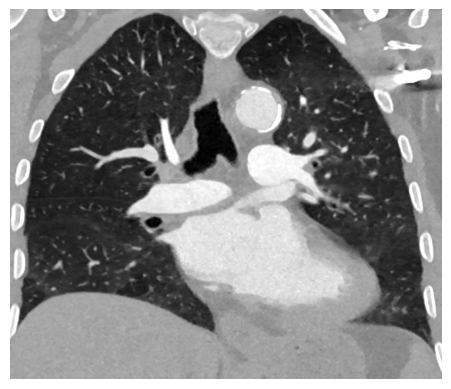

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   2.54  471.31 1176.78]
Camera Focal Point [   2.54 -128.69 1176.78]
Origin:  (-122.1, -214.0, 1070.0)
Dimensions:  (656, 449, 562)
Center:  [   2.54 -128.69 1176.78]
Process Completed


In [3]:
# This code creates coronal slice image, 3D segmentation image, and 3D lung Mask if the segmentations and label maps were created correctly


import os
import pandas as pd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nrrd
from PIL import Image, ImageDraw
import os
import vtk
from mayavi import mlab

# Keep Case Numbers undefined if the previous code blocks were ran, otherwise you can specify a case number to choose to run through the image creation program
# case_numbers = [17]

def find_files(folder_path):
    vx3_file = None
    mask_file = None
    label_file = None
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file == "Vx3.nrrd":
                vx3_file = os.path.join(root, file)
            elif file.endswith(".mask.nii.gz"):
                mask_file = os.path.join(root, file)
            elif file.endswith("label.nrrd"):
                label_file = os.path.join(root, file)
        
        if vx3_file and mask_file and label_file:
            break  # All files are found, exit the loop
    
    return vx3_file, mask_file, label_file

base_folder = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/"

for case_number in case_numbers:
    case_folder_prefix = f"Case-{case_number}-"
    
    for folder in os.listdir(base_folder):
        if folder.startswith(case_folder_prefix):
            folder_path = os.path.join(base_folder, folder)
            vx3_file, mask_file, label_file = find_files(folder_path)

            if vx3_file and mask_file and label_file:
                print("All files were found for", folder)
                print("Vx3 File:", vx3_file)
                print("Mask File:", mask_file)
                print("Label File:", label_file)
                # 200 FINAL WORKING CODE FOR IMAGE GENERATION FOR ONE CASE
                ############################################################################################################################################################
                # QC IMAGE STUFF
                # Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"
                Vx3Path = vx3_file
                labelpath = label_file
                maskpath = mask_file
                output_path = 'z:/Q- Figures/T32-Poster/Nate/Experiment/'
                filename = output_path + "-QC-Image.png"
                final_filename = output_path + "-QC-Image(2CM).png"
                Vx3_path = Vx3Path
                
                # 3D Screenshot Stuff check for repeats
                nrrd_file_path = labelpath
                segmentation_path = labelpath
                case_number = folder
                output_path_seg = 'z:/Q- Figures/T32-Poster/Nate/Experiment/'  # Change this to your desired output directory
                output_nrrd_file_path = "z:/Q- Figures/T32-Poster/Nate/Experiment/"

                # These filenames are just to have the program run all at the same time
                Aseed_filename_base = case_number + "Aseed"
                Vseed_filename_base = case_number + "Vseed"

                vtk_filename_aseed = f"{Aseed_filename_base}.vtk"
                vtk_filename_vseed = f"{Vseed_filename_base}.vtk"
                output_filename_aseed = output_path_seg + vtk_filename_aseed
                output_filename_vseed = output_path_seg + vtk_filename_vseed
                screenshot_filename = "Model.png"


                models_folder = os.path.join(os.path.dirname(output_path), "QC-Images")
                os.makedirs(models_folder, exist_ok=True)

                # Load the image using nibabel to see image information
                data, header = nrrd.read(Vx3_path)

                # Print the metadata
                print("Data Shape:", data.shape)
                print("Data Type:", data.dtype)
                print("Header:", header)

                # Load the 3D image
                Vx3 = sitk.ReadImage(Vx3_path)
                print("Reading Vx3...")
                # Get the size of the image in x, y, and z dimensions
                size_x, size_y, size_z = Vx3.GetSize()
                spacing = Vx3.GetSpacing()
                y_index = Vx3.GetSize()[1] // 2
                print("Spacing:", spacing)

                # Extract the middle plane along the y-dimension
                slice_2d = Vx3[:,y_index,:]
                slice_array = sitk.GetArrayFromImage(slice_2d)

                # Set the Window level
                window_level_min = -1024  # Adjust these values according to your preference
                window_level_max = 650

                # Apply Window Level to image
                windowed_image = sitk.IntensityWindowing(slice_2d, window_level_min, window_level_max, 0, 255)
                windowed_slice_array = sitk.GetArrayFromImage(windowed_image)

                #Show Vx3 with correct window level
                plt.imshow(windowed_slice_array, cmap="gray",origin='lower')
                plt.axis("off")
                plt.show()

                # Save the Corrected Vx3 .PNG to output path
                output_file_path = os.path.join(models_folder, filename)
                plt.imsave(filename, windowed_slice_array, cmap="gray", origin='lower')
                print("Image saved at:", output_file_path)

                # Load the image
                image_path = filename
                output_path_png = output_path + "/QC-Images/" + case_folder_prefix + "QC-Image(2CM).png"
                image = Image.open(image_path)

                # Determine line position
                line_start_x = 65 # 65 pixels from the left
                line_start_y = image.height - 35 # 35 pixels from the bottom

                # Calculate line end position
                line_end_x = line_start_x + int(20 / 0.38)  # 10 cm converted to pixels
                line_end_y = line_start_y

                # Draw the white line
                draw = ImageDraw.Draw(image)
                draw.line([(line_start_x, line_start_y), (line_end_x, line_end_y)], fill='white', width=2)
                # # Save the modified image
                image.save(output_path_png)

                print("Scale bar added and image saved.")

                #############################################################################################################################################################


                def update_camera_info(obj, evt):
                    camera = mlab.gcf().scene.camera
                    print("Camera Position:", camera.position)
                    print("Camera Focal Point:", camera.focal_point)
                    print("Camera View Up:", camera.view_up)


                # This line creates Models Forlder if not already made
                if not os.path.exists(output_path_seg):
                    os.makedirs(output_path_seg)


                # Load the .nrrd segmentation for Vseed
                nrrd_reader_vseed = vtk.vtkNrrdReader()
                nrrd_reader_vseed.SetFileName(segmentation_path)
                nrrd_reader_vseed.Update()

                vtk_image_data_vseed = vtk.vtkImageData()
                vtk_image_data_vseed.DeepCopy(nrrd_reader_vseed.GetOutput())

                # Define scalar value for "Vseed" segment
                vseed_scalar_value = 2

                # Create a Marching Cubes filter for "Vseed" segment
                contour_vseed = vtk.vtkMarchingCubes()
                contour_vseed.SetInputData(vtk_image_data_vseed)
                contour_vseed.SetValue(0, vseed_scalar_value)
                contour_vseed.Update()

                # Write the "Vseed" mesh to a .vtk file
                vtk_writer_vseed = vtk.vtkPolyDataWriter()
                vtk_writer_vseed.SetFileName(output_filename_vseed) 
                vtk_writer_vseed.SetInputData(contour_vseed.GetOutput())
                vtk_writer_vseed.Write()

                print("Vseed Segmentation conversion complete.")

                # Read the .nrrd file
                data, header = nrrd.read(nrrd_file_path)

                data[data == 2] = 0 
                output_nrrd_file_path = output_path + "Segmentation(Aseed).nrrd"
                # Write the modified data and header to a new .nrrd file
                nrrd.write(output_nrrd_file_path, data, header)
                print("Aseed.nrrd created!")
                # Load the .nrrd segmentation for Aseed
                nrrd_reader_aseed = vtk.vtkNrrdReader()
                nrrd_reader_aseed.SetFileName(output_nrrd_file_path)
                nrrd_reader_aseed.Update()

                vtk_image_data_aseed = vtk.vtkImageData()
                vtk_image_data_aseed.DeepCopy(nrrd_reader_aseed.GetOutput())

                # Define scalar value for "Aseed" segment
                aseed_scalar_value = 1

                # Create a Marching Cubes filter for "Aseed" segment
                contour_aseed = vtk.vtkMarchingCubes()
                contour_aseed.SetInputData(vtk_image_data_aseed)
                contour_aseed.SetValue(0, aseed_scalar_value)
                contour_aseed.Update()

                # Write the "Aseed" mesh to a .vtk file
                vtk_writer_aseed = vtk.vtkPolyDataWriter()
                vtk_writer_aseed.SetFileName(output_filename_aseed) 
                vtk_writer_aseed.SetInputData(contour_aseed.GetOutput())
                vtk_writer_aseed.Write()

                print("Aseed Segmentation Conversion Complete")

                #CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
                screenshot_output = output_path_seg + case_number + screenshot_filename

                mlab.figure(bgcolor=(1, 1, 1))
                srcA = mlab.pipeline.open(output_filename_aseed)
                srcV = mlab.pipeline.open(output_filename_vseed)

                # Create a surface visualization of the data with blue color and 50% opacity
                surfaceA = mlab.pipeline.surface(srcA, color=(0, 151/255, 206/255), opacity=1)
                surfaceV = mlab.pipeline.surface(srcV, color=(216/255, 101/255, 79/255), opacity=1)

                # Find Segmentation Center
                model = sitk.ReadImage(segmentation_path)
                origin = model.GetOrigin()
                dimensions = model.GetSize()
                direction = model.GetDirection()
                spacing = (0.38, 0.38, 0.38)
                distance = np.array(spacing) * np.array(dimensions)
                center = np.array(origin) + np.array(distance) / 2


                x, y, z = center[0], center[1], center[2]
                ypt = y + 600

                camera_focal_point = np.array([x, y, z])
                camera_position = np.array([x,ypt,z])

                # Set the camera parameters
                # Write code to calculate this
                mlab.gcf().scene.camera.position = [x, ypt, z]
                mlab.gcf().scene.camera.focal_point = [x, y, z]
                mlab.gcf().scene.camera.view_up = [0, 0, 1]

                # Attach the callback to the interaction event
                mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)

                magnification_factor = 5
                mlab.savefig(screenshot_output, magnification=magnification_factor)


                print("Process Completed")

                ###################################################################################################################################################################

                # 2 to fix (nearly done)
                ## THIS CODE WORKS TO MAKE A MODEL AND POSITION IT AT A FAVORABLE ANGLE TO TAKE AN IMAGE OF THE MAYAVI REPRESENTATION OF THE MODEL

                # QC IMAGE STUFF
                # Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"

                # 3D Screenshot Stuff check for repeats
                nrrd_file_path = labelpath
                segmentation_path = labelpath
                # output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/Aseed.nrrd"

                # Path to the input NIfTI file
                input_nifti_path_mask = maskpath
                # Path to save the output NRRD file
                output_nrrd_path_mask = 'z:/Q- Figures/T32-Poster/Nate/Experiment/Case-30-Lung-Mask.nrrd'
                # Load the NIfTI image
                nifti_image = sitk.ReadImage(input_nifti_path_mask)
                # Create a writer for NRRD format
                nrrd_writer = sitk.ImageFileWriter()
                nrrd_writer.SetFileName(output_nrrd_path_mask)
                # Convert the NIfTI image to a Numpy array
                nifti_array = sitk.GetArrayFromImage(nifti_image)
                # Convert the Numpy array back to a SimpleITK image
                nrrd_image = sitk.GetImageFromArray(nifti_array)
                # Copy information (metadata) from NIfTI image to NRRD image
                nrrd_image.CopyInformation(nifti_image)
                # Write the NRRD image
                nrrd_writer.Execute(nrrd_image)
                print("Conversion complete.")

                masknrrdpath = output_nrrd_path_mask

                # These filenames are just to have the program run all at the same time
                rLung_filename_base = case_number + "Lungs"
                Aseed_filename_base = case_number + "Aseed"

                vtk_filename_rLung = f"{rLung_filename_base}.vtk"
                vtk_filename_Aseed = f"{Aseed_filename_base}.vtk"
                output_filename_rLung = output_path_seg + vtk_filename_rLung
                output_filename_Aseed = output_path_seg + vtk_filename_Aseed
                lung_screenshot_filename = "Lung-Mask.png"
                print("yay")
                # This line creates Models Forlder if not already made
                if not os.path.exists(output_path_seg):
                    os.makedirs(output_path_seg)

                data, header = nrrd.read(output_nrrd_path_mask)
                data[data == 17] = 3
                data[data == 5] = 3
                print("yay")
                # Load the .nrrd segmentation for Vseed
                nrrd_reader_rLung = vtk.vtkNrrdReader()
                nrrd_reader_rLung.SetFileName(output_nrrd_path_mask)
                nrrd_reader_rLung.Update()

                vtk_image_data_rLung = vtk.vtkImageData()
                vtk_image_data_rLung.DeepCopy(nrrd_reader_rLung.GetOutput())

                # Define scalar value for "Vseed" segment
                rLung_scalar_value = 3

                # Create a Marching Cubes filter for "Vseed" segment
                contour_rLung = vtk.vtkMarchingCubes()
                contour_rLung.SetInputData(vtk_image_data_rLung)
                contour_rLung.SetValue(0, rLung_scalar_value)
                contour_rLung.Update()
                print("yay")
                # Write the "Vseed" mesh to a .vtk file
                vtk_writer_rLung = vtk.vtkPolyDataWriter()
                vtk_writer_rLung.SetFileName(output_filename_rLung)
                vtk_writer_rLung.SetInputData(contour_rLung.GetOutput())
                vtk_writer_rLung.Write()
                print("Lung conversion complete.")

                #CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
                screenshot_output = output_path_seg + case_number + lung_screenshot_filename
                mlab.figure(bgcolor=(1, 1, 1))
                srcrLung = mlab.pipeline.open(output_filename_rLung)
                srcAseed = mlab.pipeline.open(output_filename_Aseed)

                # Create a surface visualization of the data with blue color and 50% opacity
                surfaceR = mlab.pipeline.surface(srcrLung, color=(128/255, 174/255, 128/255), opacity=.15)
                surfaceAseed = mlab.pipeline.surface(srcAseed, color=(0, 151/255, 206/255), opacity=1)

                x, y, z = center[0], center[1], center[2]
                ypt = y + 600

                camera_focal_point = np.array([x, y, z])
                camera_position = np.array([x,ypt,z])

                print("Camera Position", camera_position)
                print("Camera Focal Point", camera_focal_point)

                # Set the camera parameters
                # Write code to calculate this
                mlab.gcf().scene.camera.position = [x, ypt, z]
                mlab.gcf().scene.camera.focal_point = [x, y, z]
                mlab.gcf().scene.camera.view_up = [0, 0, 1]

                print("Origin: ", origin)
                print("Dimensions: ", dimensions)
                print("Center: ", center)

                # Attach the callback to the interaction event

                magnification_factor = 5
                mlab.savefig(screenshot_output, magnification=magnification_factor)
                
                
                print("Process Completed")

            else:
                print("One or more files were not found for", folder)

            
           
            

In [1]:
! pip -V

pip 23.2.1 from C:\Users\ndnewcomb\AppData\Roaming\Python\Python311\site-packages\pip (python 3.11)



In [ ]:
# Renaming files that 
import os

# Root directory
root_directory = "Z:/Q- Figures&Reports/T32-Poster/Nate/Experiment/"

# Recursive function to rename files
def rename_files(directory):
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            if filename.endswith("Lung-Mask-Model.png"):
                old_path = os.path.join(dirpath, filename)
                new_filename = filename.replace("Lung-Mask-Model.png", "Lung-Mask.png")
                new_path = os.path.join(dirpath, new_filename)
                os.rename(old_path, new_path)
                print(f"Renamed {filename} to {new_filename}")

# Call the function to rename files in the specified directory and its subdirectories
rename_files(root_directory)


In [ ]:
import os

# List of case numbers
  # Add more case numbers if needed

# Root directory
root_directory = "Z:/Q- Figures&Reports/T32-Poster/Nate/Experiment/"

# Search for the image files in each case folder
for case_number in case_numbers:
    case_folder = os.path.join(root_directory, f"Case-{case_number}")
    
    # Check if the case folder exists
    if os.path.exists(case_folder) and os.path.isdir(case_folder):
        lung_mask_found = False
        model_found = False
        
        # Search for the image files within the case folder
        for file_name in os.listdir(case_folder):
            if file_name.endswith("Lung-Mask.png"):
                lung_mask_found = True
                lung_mask_file_path = os.path.join(case_folder, file_name)
            
            if file_name.endswith("Model.png"):
                model_found = True
                model_file_path = os.path.join(case_folder, file_name)
            
            # If both files are found, no need to continue searching
            if lung_mask_found and model_found:
                
                break
        
        if lung_mask_found and model_found:
            print(f"Both Lung-Mask.png and Model.png files found in Case-{case_number}")
        elif lung_mask_found:
            print(f"Only Lung-Mask.png found in Case-{case_number}")
        elif model_found:
            print(f"Only Model.png found in Case-{case_number}")
        else:
            print(f"Neither Lung-Mask.png nor Model.png found in Case-{case_number}")


In [ ]:
import os
import shutil

# List of case numbers
 # Add more case numbers if needed
case_numbers = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15 ,16, 17, 18, 19, 20, 21, 23, 27, 37, 87, 88, 89, 90, 91, 95]
# Root directory
root_directory = "Z:/Q- Figures/T32-Poster/Nate/Experiment/"

# Directory for 3D Images
output_directory = os.path.join(root_directory, "3D Images")
os.makedirs(output_directory, exist_ok=True)

# Search for the image files in each case folder
for case_number in case_numbers:
    case_folder = os.path.join(root_directory, f"Case-{case_number}")
    
    # Check if the case folder exists
    if os.path.exists(case_folder) and os.path.isdir(case_folder):
        lung_mask_found = False
        model_found = False
        
        # Search for the image files within the case folder
        for file_name in os.listdir(case_folder):
            if file_name.endswith("Lung-Mask-Model.png"):
                lung_mask_found = True
                lung_mask_file_path = os.path.join(case_folder, file_name)
            
            if file_name.endswith("Model.png"):
                model_found = True
                model_file_path = os.path.join(case_folder, file_name)
            
            # If both files are found, no need to continue searching
            if lung_mask_found and model_found:
                break
        
        if lung_mask_found and model_found:
            print(f"Both Lung-Mask.png and Model.png files found in Case-{case_number}")
            
            # Copy files to the output directory
            shutil.copy2(lung_mask_file_path, output_directory)
            shutil.copy2(model_file_path, output_directory)
            
        elif lung_mask_found:
            print(f"Only Lung-Mask.png found in Case-{case_number}")
            shutil.copy2(lung_mask_file_path, output_directory)
            
        elif model_found:
            print(f"Only Model.png found in Case-{case_number}")
            shutil.copy2(model_file_path, output_directory)
            
        else:
            print(f"Neither Lung-Mask.png nor Model.png found in Case-{case_number}")


In [5]:
import os

folder_path = "Z:/Q- Figures/T32-Poster/Nate/Experiment/3D Images/"

# List all files in the folder
file_list = os.listdir(folder_path)

# Loop through each 
for filename in file_list:
    if filename.endswith("-Model.png"):
        original_name = filename.replace("-Model.png", ".png")
        original_path = os.path.join(folder_path, original_name)
        new_path = os.path.join(folder_path, filename)
        
        # Rename the file
        os.rename(new_path, original_path)
        print(f"Renamed {filename} to {original_name}")

Renamed Case-1-MESAL-5010098-E3Lung-Mask-Model.png to Case-1-MESAL-5010098-E3Lung-Mask.png
Renamed Case-10-MESAL-3016340-E3Lung-Mask-Model.png to Case-10-MESAL-3016340-E3Lung-Mask.png
Renamed Case-11-MESAL-3016587-E3Lung-Mask-Model.png to Case-11-MESAL-3016587-E3Lung-Mask.png
Renamed Case-12-MESAL-7018380-E3Lung-Mask-Model.png to Case-12-MESAL-7018380-E3Lung-Mask.png
Renamed Case-14-MESAL-6011020-E3Lung-Mask-Model.png to Case-14-MESAL-6011020-E3Lung-Mask.png
Renamed Case-15-MESAL-7018347-E3Lung-Mask-Model.png to Case-15-MESAL-7018347-E3Lung-Mask.png
Renamed Case-16-MESAL-5014832-E3Lung-Mask-Model.png to Case-16-MESAL-5014832-E3Lung-Mask.png
Renamed Case-17-MESAL-3012603-E3Lung-Mask-Model.png to Case-17-MESAL-3012603-E3Lung-Mask.png
Renamed Case-18-MESAL-6022812-E3Lung-Mask-Model.png to Case-18-MESAL-6022812-E3Lung-Mask.png
Renamed Case-19---MaskImageGeomMismatch---MESAL-3012840-E3Lung-Mask-Model.png to Case-19---MaskImageGeomMismatch---MESAL-3012840-E3Lung-Mask.png
Renamed Case-2-MESAL

In [4]:
import os
import shutil

# Root directory
root_directory = "Z:/Q- Figures/T32-Poster/Nate/Experiment/"

# Directory for 3D Images
output_directory = os.path.join(root_directory, "3D Images")
os.makedirs(output_directory, exist_ok=True)

# Search for the image files in each case folder
for case_folder_name in os.listdir(root_directory):
    case_folder = os.path.join(root_directory, case_folder_name)
    
    # Check if it's a directory and starts with "Case-"
    if os.path.isdir(case_folder) and case_folder_name.startswith("Case-"):
        lung_mask_found = False
        model_found = False
        
        for file_name in os.listdir(case_folder):
            if file_name.endswith("Lung-Mask-Model.png"):
                lung_mask_found = True
                lung_mask_file_path = os.path.join(case_folder, file_name)
            
            elif file_name.endswith("Model.png"):
                model_found = True
                model_file_path = os.path.join(case_folder, file_name)
            
            # If both files are found, no need to continue searching
            if lung_mask_found and model_found:
                break
        
        if lung_mask_found and model_found:
            print(f"Both Lung-Mask-Model.png and E3Model.png found in {case_folder_name}")
            
            # Copy files to the output directory
            shutil.copy2(lung_mask_file_path, output_directory)
            shutil.copy2(model_file_path, output_directory)
            
        elif lung_mask_found:
            print(f"Only Lung-Mask-Model.png found in {case_folder_name}")
            
        elif model_found:
            print(f"Only E3Model.png found in {case_folder_name}")
            
        else:
            print(f"Neither Lung-Mask-Model.png nor E3Model.png found in {case_folder_name}")


Both Lung-Mask-Model.png and E3Model.png found in Case-1
Both Lung-Mask-Model.png and E3Model.png found in Case-10
Both Lung-Mask-Model.png and E3Model.png found in Case-11
Both Lung-Mask-Model.png and E3Model.png found in Case-12
Both Lung-Mask-Model.png and E3Model.png found in Case-14(new vx3)
Both Lung-Mask-Model.png and E3Model.png found in Case-15(new vx3)
Both Lung-Mask-Model.png and E3Model.png found in Case-16
Both Lung-Mask-Model.png and E3Model.png found in Case-17
Both Lung-Mask-Model.png and E3Model.png found in Case-18(new vx3)
Both Lung-Mask-Model.png and E3Model.png found in Case-19
Both Lung-Mask-Model.png and E3Model.png found in Case-2
Both Lung-Mask-Model.png and E3Model.png found in Case-20
Both Lung-Mask-Model.png and E3Model.png found in Case-21
Both Lung-Mask-Model.png and E3Model.png found in Case-22
Both Lung-Mask-Model.png and E3Model.png found in Case-23
Both Lung-Mask-Model.png and E3Model.png found in Case-24
Both Lung-Mask-Model.png and E3Model.png found 

In [1]:
# Working to write to word documents 
from docx import Document
import glob
from PIL import Image
from docx.shared import Inches, Cm, Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.enum.table import WD_ALIGN_VERTICAL

doc = Document()
num_rows = 77
num_cols = 5
table = doc.add_table(rows=num_rows, cols=num_cols)
table.style = 'Table Grid'

titles = ["Index", "Case Number", "Coronal Image", "3D Segmentation", "3D Lung Mask"]
header_cells = table.rows[0].cells
for i in range(num_cols):
    header_cells[i].text = titles[i]

image_folder = 'Z:/Q- Figures/T32-Poster/Nate/Experiment/QC-Images/'
lung_mask_folder = 'Z:/Q- Figures/T32-Poster/Nate/Experiment/3D Images/'
model_image_folder = 'Z:/Q- Figures/T32-Poster/Nate/Experiment/3D Images/'

image_files = glob.glob(image_folder + '/*.png')
lung_mask_files = glob.glob(lung_mask_folder + '/*Lung-Mask.png')
model_image_files = glob.glob(model_image_folder + '/*Model.png')



for row_index, (image_path, lung_mask_path, model_image_path) in enumerate(zip(image_files, lung_mask_files, model_image_files), start=1):
    row = table.rows[row_index].cells
    img = Image.open(image_path)
    lung_mask_img = Image.open(lung_mask_path)
    model_img = Image.open(model_image_path)

    new_width = int(img.width)

    row[0].text = str(row_index)
    model_filename = model_image_path.split('\\')[-1]  # Split by backslash and take the last part
    case_number1 = model_filename.replace('Model.png', '')  # Remove '_Model.png' suffix
    case_number1 = model_filename.replace('Model.png', '')
    row[1].text = case_number1
    
    cell = row[2]
    cell.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
    cell_paragraph = cell.paragraphs[0]
    cell_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    run = cell_paragraph.add_run()
    run.add_picture(image_path, width=Cm(new_width/300))
    
    model_cell = row[3]  # 4th column
    model_cell.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
    model_paragraph = model_cell.paragraphs[0]
    model_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    model_run = model_paragraph.add_run()
    model_run.add_picture(model_image_path, width=Cm(new_width/200))
    
    lung_mask_cell = row[4]
    lung_mask_cell.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
    lung_mask_paragraph = lung_mask_cell.paragraphs[0]
    lung_mask_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    lung_mask_run = lung_mask_paragraph.add_run()
    lung_mask_run.add_picture(lung_mask_path, width=Cm(new_width/200))

for row in table.rows:
    for cell in row.cells[:2]:
        for paragraph in cell.paragraphs:
            for run in paragraph.runs:
                font = run.font
                font.size = Pt(6)  # Adjust font size as needed

output_path = 'Z:/Q- Figures/T32-Poster/Nate/Experiment/CaseImages.docx'
doc.save(output_path)
print(f"Document saved to: {output_path}")

Document saved to: Z:/Q- Figures/T32-Poster/Nate/Experiment/CaseImages.docx


In [140]:
from docx import Document
import glob
from PIL import Image
from docx.shared import Inches, Cm, Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.enum.table import WD_ALIGN_VERTICAL

doc = Document()
num_rows = 77
num_cols = 5
table = doc.add_table(rows=num_rows, cols=num_cols)
table.style = 'Table Grid'

titles = ["Index", "Case Number", "Coronal Image", "3D Segmentation", "3D Lung Mask"]
header_cells = table.rows[0].cells
for i in range(num_cols):
    header_cells[i].text = titles[i]

image_folder = 'Z:/Q- Figures/T32-Poster/Nate/Experiment/QC-Images/'
lung_mask_folder = 'Z:/Q- Figures/T32-Poster/Nate/Experiment/3D Images/'
model_image_folder = 'Z:/Q- Figures/T32-Poster/Nate/Experiment/3d Images/'

image_files = glob.glob(image_folder + '/*.png')
lung_mask_files = glob.glob(lung_mask_folder + '/*Lung-Mask.png')
model_image_files = glob.glob(model_image_folder + '/*Model.png')


# Set initial column widths (in Inches)
col_widths = [.5, 1, 3.5, 3.5, 3.5]

# Populate the first row with dummy values and set column widths
for i, width in enumerate(col_widths):
    cell = table.cell(0, i)
    cell.width = Inches(width)
    cell.text = ""

# Populate the table (optional)
for row in table.rows:
    for cell in row.cells:
        cell.text = "Cell Text"

output_path = 'Z:/Q- Figures/T32-Poster/Nate/Experiment/CaseImages(triAL).docx'
doc.save(output_path)
print(f"Document saved to: {output_path}")


Document saved to: Z:/Q- Figures/T32-Poster/Nate/Experiment/CaseImages(triAL).docx


All files were found for Case-1-MESAL-5010098-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-1-MESAL-5010098-E3\Markups\88-Nate\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-1-MESAL-5010098-E3\seg_net\MESAL-5010098-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-1-MESAL-5010098-E3\Markups\88-Nate\S-Final-1-label.nrrd
Data Shape: (625, 451, 632)
Data Type: int16
Header: OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([625, 451, 632])), ('space directions', array([[0.38, 0.  , 0.  ],
       [0.  , 0.38, 0.  ],
       [0.  , 0.  , 0.38]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([-116.8, -226.2, -734.7]))])
Reading Vx3...
Spacing: (0.38000000000000006, 0.38000000000000006, 0.38000000000000006)


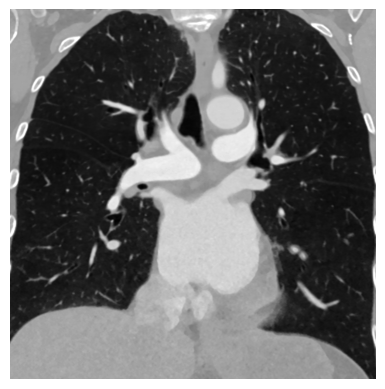

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   1.95  459.49 -614.62]
Camera Focal Point [   1.95 -140.51 -614.62]
Origin:  (-116.80000000000003, -226.20000000000002, -734.7)
Dimensions:  (625, 451, 632)
Center:  [   1.95 -140.51 -614.62]
Process Completed
One or more files were not found for Case-2-MESAL-5010730-E3
All files were found for Case-3-MESAL-6011969-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-3-MESAL-6011969-E3\Markups\88-Jensen\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-3-MESAL-6011969-E3\seg_net\MESAL-6011969-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-3-MESAL-6011969-E3\Markups\88-Jensen\99-Old Segmentation\S-Final-2-la

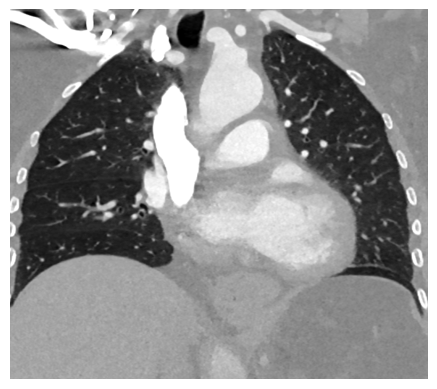

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   2.96  454.48 -146.51]
Camera Focal Point [   2.96 -145.52 -146.51]
Origin:  (-108.00000000000003, -220.0, -217.00000000000006)
Dimensions:  (584, 392, 371)
Center:  [   2.96 -145.52 -146.51]
Process Completed
All files were found for Case-4-MESAL-5010942-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-4-MESAL-5010942-E3\Markups\88-Adam\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-4-MESAL-5010942-E3\seg_net\MESAL-5010942-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-4-MESAL-5010942-E3\Markups\88-Adam\S-Final-2-label.nrrd
Data Shape: (659, 520, 626)
Data Type: int16
Header: OrderedDict([('type', '

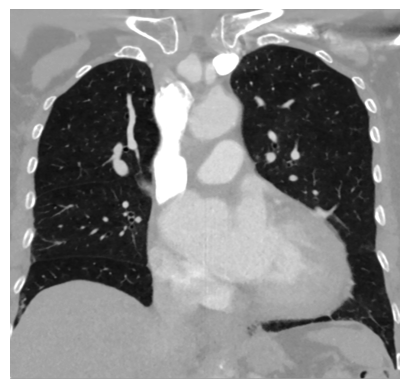

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [-1.9000e-01  4.5170e+02 -4.9716e+02]
Camera Focal Point [-1.9000e-01 -1.4830e+02 -4.9716e+02]
Origin:  (-125.40000000000002, -247.10000000000002, -616.1)
Dimensions:  (659, 520, 626)
Center:  [-1.9000e-01 -1.4830e+02 -4.9716e+02]
Camera Position: [-1.9000e-01  4.5170e+02 -4.9716e+02]
Camera Focal Point: [-1.9000e-01 -1.4830e+02 -4.9716e+02]
Camera View Up: [0. 0. 1.]
Camera Position: [-1.9000e-01  4.5170e+02 -4.9716e+02]
Camera Focal Point: [-1.9000e-01 -1.4830e+02 -4.9716e+02]
Camera View Up: [0. 0. 1.]
Camera Position: [-1.9000e-01  4.5170e+02 -4.9716e+02]
Camera Focal Point: [-1.9000e-01 -1.4830e+02 -4.9716e+02]
Camera View Up: [0. 0. 1.]
Camera Position: [-1.9000e-01  4.5170e+02 -4.97

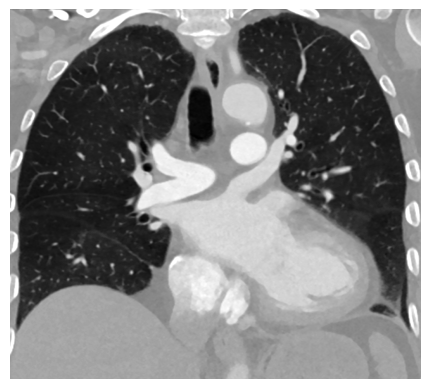

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   7.47  458.06 -130.83]
Camera Focal Point [   7.47 -141.94 -130.83]
Origin:  (-109.0, -213.00000000000003, -215.00000000000003)
Dimensions:  (613, 374, 443)
Center:  [   7.47 -141.94 -130.83]
Camera Position: [   7.47       353.9277686 -130.83     ]
Camera Focal Point: [   7.47 -141.94 -130.83]
Camera View Up: [0. 0. 1.]
Camera Position: [   7.47       353.9277686 -130.83     ]
Camera Focal Point: [   7.47 -141.94 -130.83]
Camera View Up: [0. 0. 1.]
Process Completed
All files were found for Case-7-MESAL-5010845-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-7-MESAL-5010845-E3\Markups\Duncan\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-7-MESAL-50

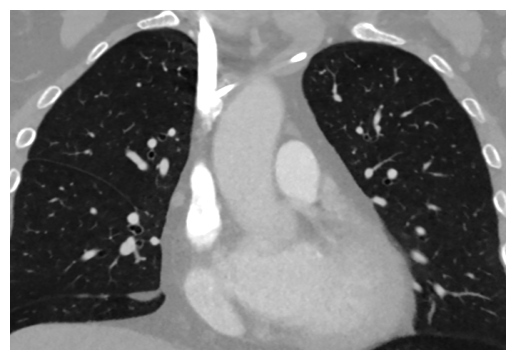

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   3.65  438.31 -741.98]
Camera Focal Point [   3.65 -161.69 -741.98]
Origin:  (-145.50000000000003, -267.90000000000003, -872.7000000000003)
Dimensions:  (785, 559, 688)
Center:  [   3.65 -161.69 -741.98]
Process Completed
All files were found for Case-9-MESAL-8014868-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-9-MESAL-8014868-E3\Markups\88-Nate\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-9-MESAL-8014868-E3\seg_net\MESAL-8014868-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-9-MESAL-8014868-E3\Markups\88-Nate\S-Final-2-label.nrrd
Data Shape: (758, 564, 672)
Data Type: int16
Header: OrderedDict

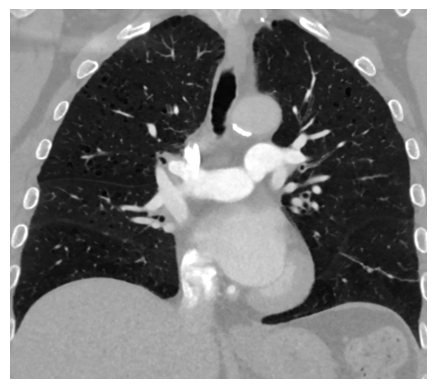

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [  -5.98  442.86 -133.02]
Camera Focal Point [  -5.98 -157.14 -133.02]
Origin:  (-150.0, -264.3, -260.70000000000005)
Dimensions:  (758, 564, 672)
Center:  [  -5.98 -157.14 -133.02]
Process Completed
All files were found for Case-10-MESAL-3016340-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-10-MESAL-3016340-E3\Markups\88-Jensen\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-10-MESAL-3016340-E3\seg_net\MESAL-3016340-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-10-MESAL-3016340-E3\Markups\88-Jensen\99-Old Segmentation\S-Final-2_1-label.nrrd
Data Shape: (635, 443, 601)
Data Type: int16
Header: Ordere

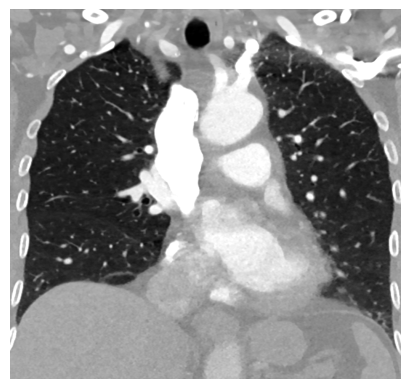

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [ 19.66 480.87 -93.79]
Camera Focal Point [  19.66 -119.13  -93.79]
Origin:  (-93.20000000000002, -193.80000000000004, -181.0)
Dimensions:  (594, 393, 459)
Center:  [  19.66 -119.13  -93.79]
Process Completed
All files were found for Case-11-MESAL-3016587-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-11-MESAL-3016587-E3\Markups\88-Nate\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-11-MESAL-3016587-E3\seg_net\MESAL-3016587-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-11-MESAL-3016587-E3\Markups\88-Nate\S-Final-2-label.nrrd
Data Shape: (631, 408, 525)
Data Type: int16
Header: OrderedDict([('type', '

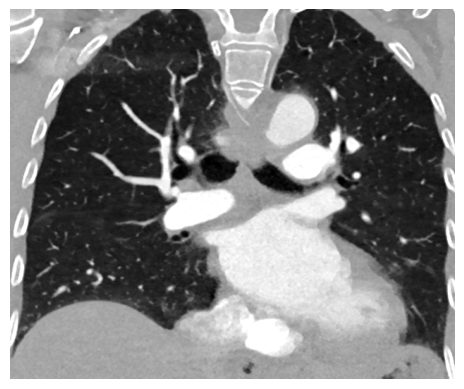

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [  -5.81  483.62 -134.75]
Camera Focal Point [  -5.81 -116.38 -134.75]
Origin:  (-125.70000000000002, -193.90000000000006, -234.50000000000003)
Dimensions:  (631, 408, 525)
Center:  [  -5.81 -116.38 -134.75]
Process Completed
All files were found for Case-12-MESAL-7018380-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-12-MESAL-7018380-E3\Markups\99-Adam\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-12-MESAL-7018380-E3\seg_net\MESAL-7018380-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-12-MESAL-7018380-E3\Markups\88-Nate\S-Final-2-label.nrrd
Data Shape: (563, 417, 483)
Data Type: int16
Header: Ordere

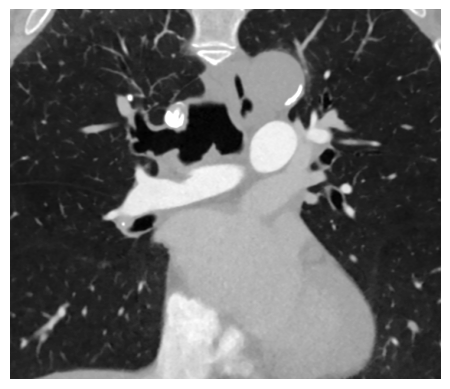

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   2.92  464.94 -176.27]
Camera Focal Point [   2.92 -135.06 -176.27]
Origin:  (-125.90000000000003, -217.90000000000006, -291.6000000000001)
Dimensions:  (678, 436, 607)
Center:  [   2.92 -135.06 -176.27]
Process Completed
All files were found for Case-14-MESAL-6011020-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-14-MESAL-6011020-E3\Markups\99-Adam\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-14-MESAL-6011020-E3\seg_net\MESAL-6011020-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-14-MESAL-6011020-E3\Markups\88-Nate\S-Final-2-label.nrrd
Data Shape: (503, 368, 392)
Data Type: int16
Header: Ordered

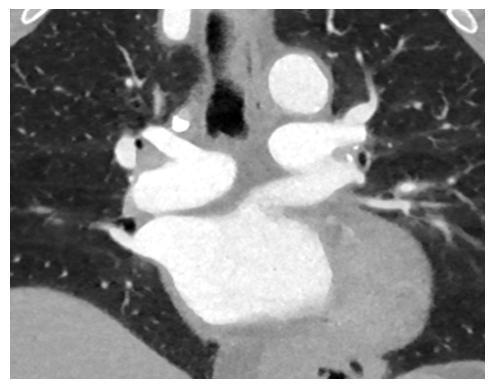

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [ 3.0000e-02  4.4975e+02 -4.1710e+01]
Camera Focal Point [ 3.0000e-02 -1.5025e+02 -4.1710e+01]
Origin:  (-134.30000000000007, -238.59999999999988, -140.7)
Dimensions:  (707, 465, 521)
Center:  [ 3.0000e-02 -1.5025e+02 -4.1710e+01]
Process Completed
All files were found for Case-15-MESAL-7018347-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-15-MESAL-7018347-E3\Markups\Nate\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-15-MESAL-7018347-E3\seg_net\MESAL-7018347-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-15-MESAL-7018347-E3\Markups\Nate\S-Final-1-label.nrrd
Data Shape: (633, 540, 561)
Data Type: int

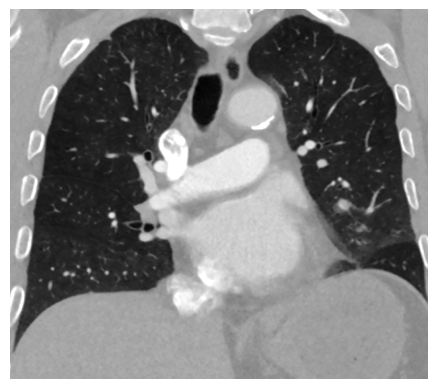

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [  -7.93  438.5  -170.21]
Camera Focal Point [  -7.93 -161.5  -170.21]
Origin:  (-128.19999999999996, -264.1000000000001, -276.8)
Dimensions:  (633, 540, 561)
Center:  [  -7.93 -161.5  -170.21]
Process Completed
All files were found for Case-16-MESAL-5014832-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-16-MESAL-5014832-E3\Markups\88-Jensen\99-Old Segmentation\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-16-MESAL-5014832-E3\seg_net\MESAL-5014832-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-16-MESAL-5014832-E3\Markups\88-Jensen\S-Final-2-label.nrrd
Data Shape: (629, 379, 526)
Data Type: int16
Head

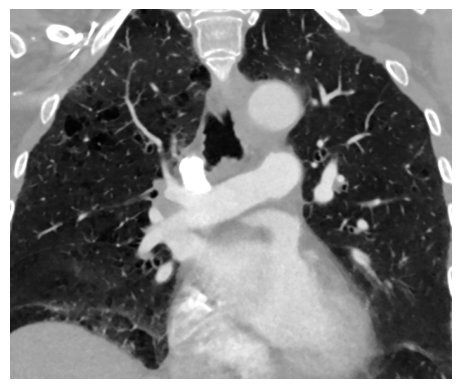

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   6.13  474.84 -541.8 ]
Camera Focal Point [   6.13 -125.16 -541.8 ]
Origin:  (-120.6, -204.2, -672.8999999999997)
Dimensions:  (667, 416, 690)
Center:  [   6.13 -125.16 -541.8 ]
Process Completed
All files were found for Case-17-MESAL-3012603-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-17-MESAL-3012603-E3\Markups\88-Duncan\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-17-MESAL-3012603-E3\seg_net\MESAL-3012603-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-17-MESAL-3012603-E3\Markups\88-Duncan\S-Final-2-label.nrrd
Data Shape: (656, 449, 562)
Data Type: int16
Header: OrderedDict([('type', 'short'

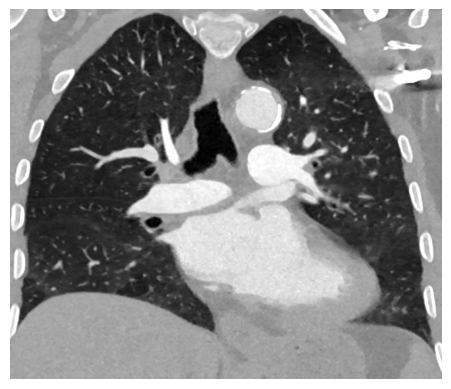

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   2.54  471.31 1176.78]
Camera Focal Point [   2.54 -128.69 1176.78]
Origin:  (-122.1, -214.0, 1070.0)
Dimensions:  (656, 449, 562)
Center:  [   2.54 -128.69 1176.78]
Process Completed
All files were found for Case-18-MESAL-6022812-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-18-MESAL-6022812-E3\Markups\88-Adam\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-18-MESAL-6022812-E3\seg_net\MESAL-6022812-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-18-MESAL-6022812-E3\Markups\88-Adam\S-Final-2-label.nrrd
Data Shape: (734, 504, 707)
Data Type: int16
Header: OrderedDict([('type', 'short'), ('dimension',

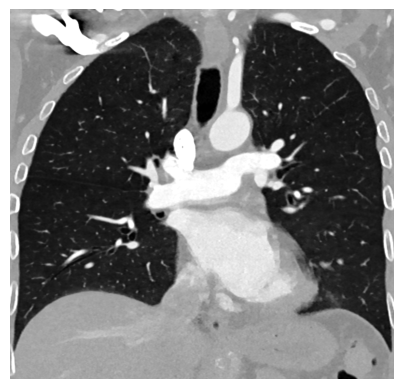

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   0.76  455.56 -207.37]
Camera Focal Point [   0.76 -144.44 -207.37]
Origin:  (-138.7, -240.1999999999999, -341.69999999999993)
Dimensions:  (734, 504, 707)
Center:  [   0.76 -144.44 -207.37]
Process Completed
All files were found for Case-19---MaskImageGeomMismatch---MESAL-3012840-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-19---MaskImageGeomMismatch---MESAL-3012840-E3\Markups\Duncan\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-19---MaskImageGeomMismatch---MESAL-3012840-E3\seg_net\MESAL-3012840-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-19---MaskImageGeomMismatch---MESAL-3012840-E3\Markups

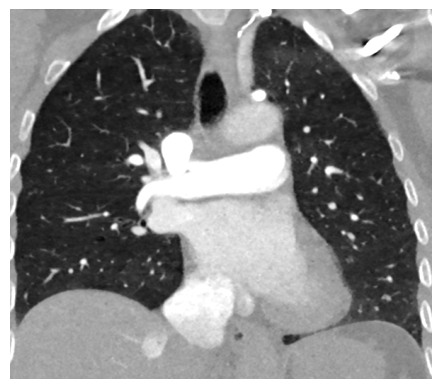

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [  -6.76  475.61 1081.47]
Camera Focal Point [  -6.76 -124.39 1081.47]
Origin:  (-120.0, -203.99999999999997, 982.1000000000001)
Dimensions:  (596, 419, 523)
Center:  [  -6.76 -124.39 1081.47]
Process Completed
All files were found for Case-20-MESAL-7015569-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-20-MESAL-7015569-E3\MarkUps\88-Jensen\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-20-MESAL-7015569-E3\seg_net\MESAL-7015569-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-20-MESAL-7015569-E3\MarkUps\88-Jensen\99-Old Segmentation\S-Final-2-label.nrrd
Data Shape: (611, 477, 567)
Data Type: int16
Heade

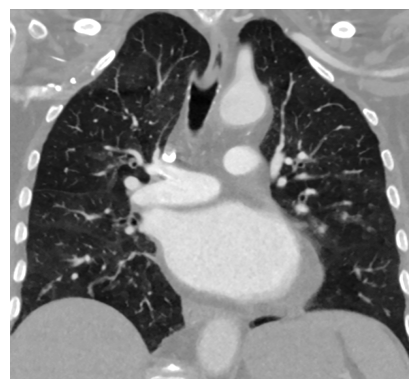

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [  -9.11  455.73 -147.37]
Camera Focal Point [  -9.11 -144.27 -147.37]
Origin:  (-125.20000000000005, -234.9, -255.10000000000002)
Dimensions:  (611, 477, 567)
Center:  [  -9.11 -144.27 -147.37]
Process Completed
All files were found for Case-21-MESAL-7018860-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-21-MESAL-7018860-E3\Markups\88-Jensen\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-21-MESAL-7018860-E3\seg_net\MESAL-7018860-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-21-MESAL-7018860-E3\Markups\88-Jensen\S-Final-2-label.nrrd
Data Shape: (671, 420, 579)
Data Type: int16
Header: OrderedDict([('

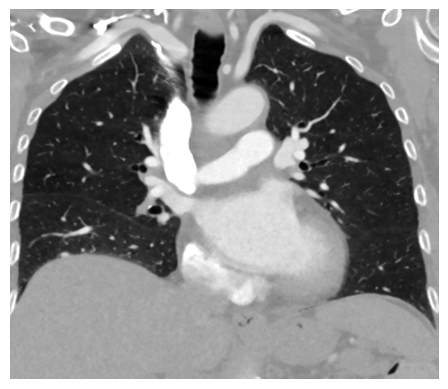

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   5.49  460.3  -144.49]
Camera Focal Point [   5.49 -139.7  -144.49]
Origin:  (-122.0, -219.49999999999991, -254.49999999999997)
Dimensions:  (671, 420, 579)
Center:  [   5.49 -139.7  -144.49]
Process Completed
All files were found for Case-23---MaskImageGeomMismatch---MESAL-3015246-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-23---MaskImageGeomMismatch---MESAL-3015246-E3\Markups\Duncan\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-23---MaskImageGeomMismatch---MESAL-3015246-E3\seg_net\MESAL-3015246-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-23---MaskImageGeomMismatch---MESAL-3015246-E3\Markup

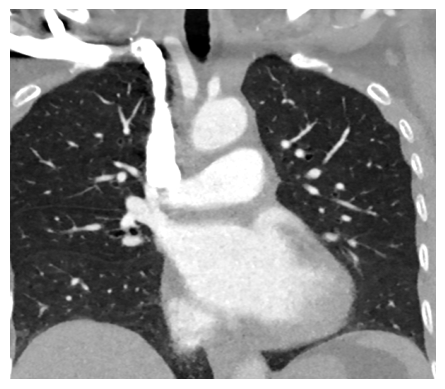

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [  5.57 449.48 859.56]
Camera Focal Point [   5.57 -150.52  859.56]
Origin:  (-109.0, -225.0, 760.0)
Dimensions:  (603, 392, 524)
Center:  [   5.57 -150.52  859.56]
Process Completed
All files were found for Case-27-MESAL-6011594-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-27-MESAL-6011594-E3\Markups\88-Adam\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-27-MESAL-6011594-E3\seg_net\MESAL-6011594-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-27-MESAL-6011594-E3\Markups\88-Adam\S-Final-2-label.nrrd
Data Shape: (592, 389, 574)
Data Type: int16
Header: OrderedDict([('type', 'short'), ('dimension', 3),

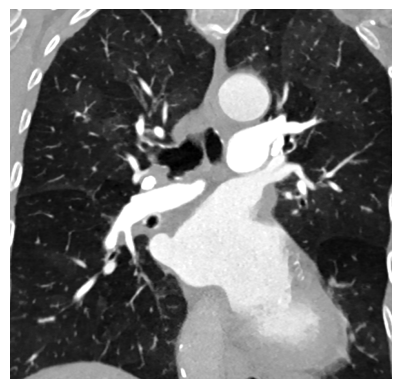

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [  -6.52  476.91 -275.94]
Camera Focal Point [  -6.52 -123.09 -275.94]
Origin:  (-119.00000000000001, -196.99999999999991, -384.99999999999994)
Dimensions:  (592, 389, 574)
Center:  [  -6.52 -123.09 -275.94]
Process Completed
All files were found for Case-37-MESAL-3016900-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-37-MESAL-3016900-E3\Markups\88-Nathan\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-37-MESAL-3016900-E3\seg_net\MESAL-3016900-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-37-MESAL-3016900-E3\Markups\88-Nathan\S-Final-1-label.nrrd
Data Shape: (633, 434, 546)
Data Type: int16
Header: Or

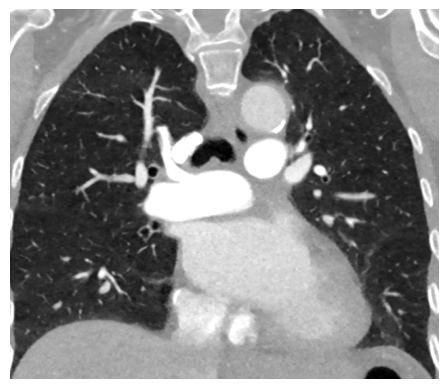

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   9.77  468.06 -170.86]
Camera Focal Point [   9.77 -131.94 -170.86]
Origin:  (-110.50000000000003, -214.39999999999998, -274.5999999999999)
Dimensions:  (633, 434, 546)
Center:  [   9.77 -131.94 -170.86]
Process Completed
One or more files were not found for Case-87-MESAL-7012705
All files were found for Case-88-MESAL-6010377
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377\Markups\88-Adam\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377\seg_net\MESAL-6010377-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-88-MESAL-6010377\Markups\88-Adam\S-Final-1-label.nrrd
Data Shape: (

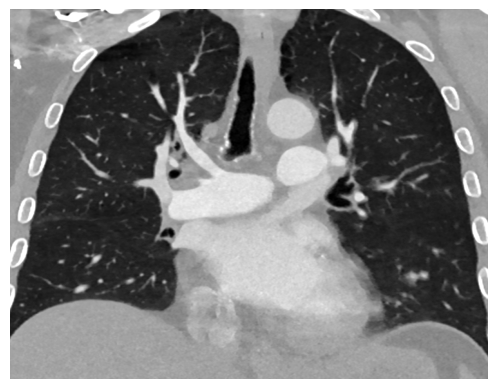

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [  9.98 457.05  95.06]
Camera Focal Point [   9.98 -142.95   95.06]
Origin:  (-131.0, -237.00000000000003, -14.000000000000004)
Dimensions:  (742, 495, 574)
Center:  [   9.98 -142.95   95.06]
Process Completed
All files were found for Case-89-MESAL-4021096-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-89-MESAL-4021096-E3\Markups\88-Jensen\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-89-MESAL-4021096-E3\seg_net\MESAL-4021096-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-89-MESAL-4021096-E3\Markups\88-Jensen\S-Final-2-label.nrrd
Data Shape: (797, 583, 711)
Data Type: int16
Header: OrderedDict([('typ

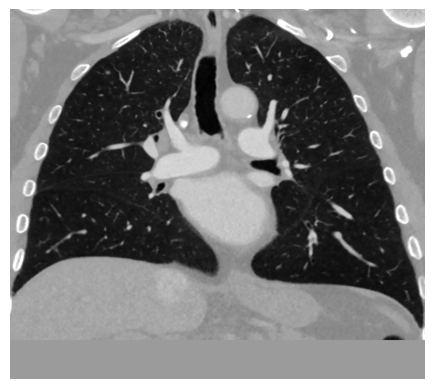

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [  10.83  424.27 -160.81]
Camera Focal Point [  10.83 -175.73 -160.81]
Origin:  (-140.60000000000002, -286.4999999999999, -295.9)
Dimensions:  (797, 583, 711)
Center:  [  10.83 -175.73 -160.81]
Process Completed
All files were found for Case-90-MESAL-5018196-E3
Vx3 File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3\Markup\88-Nate\Vx3.nrrd
Mask File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3\seg_net\MESAL-5018196-E3_FRC_0.75mm_VNC_Int16.mask.nii.gz
Label File: z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-90-MESAL-5018196-E3\Markup\88-Nate\S-Final-1-label.nrrd
Data Shape: (603, 446, 642)
Data Type: int16
Header: OrderedDict([('type', 

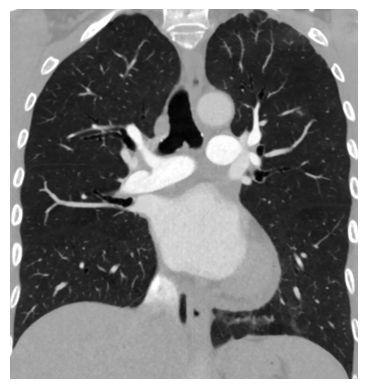

Image saved at: z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [  -1.23  473.04 -389.92]
Camera Focal Point [  -1.23 -126.96 -389.92]
Origin:  (-115.80000000000001, -211.7, -511.90000000000003)
Dimensions:  (603, 446, 642)
Center:  [  -1.23 -126.96 -389.92]
Process Completed
One or more files were not found for Case-91-MESAL-3021556-E3
One or more files were not found for Case-95-MESAL-4016645-E3


In [1]:
# YES WORKING TO FIND ALL THREE FILES CONTAINED WITHIN THE subdirectory 1-DONE THIS IS FOR MESA
import os
import pandas as pd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nrrd
from PIL import Image, ImageDraw
import os
import vtk
from mayavi import mlab

# excel_file_path = 'z:/Q- Figures/T32-Poster/Nate/T7-Summary(LocalOld).xlsx'
# # Read the Excel file
# data = pd.read_excel(excel_file_path, skiprows=[0])

# # Define the indices for the columns you're interested in (0-based indexing)
# column2_index = 1  # Replace with the correct index for column 2
# column3_index = 2  # Replace with the correct index for column 3

# # Filter out rows where column 3 has a value but column 2 is blank
# filtered_data = data[data.iloc[:, column2_index].notna() | data.iloc[:, column3_index].isna()]

# # Extract the second and third columns from the filtered data and convert them to lists
# second_column = filtered_data.iloc[:, column2_index].tolist()
# third_column = filtered_data.iloc[:, column3_index].tolist()

# # Remove 'NaN' values from the lists
# indices = [int(value) for value in second_column if not pd.isna(value)]
# case_numbers = [int(value) for value in third_column if not pd.isna(value)]
case_numbers = [1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 14, 15 ,16, 17, 18, 19, 20, 21, 23, 27, 37, 87, 88, 89, 90, 91, 95]

def find_files(folder_path):
    vx3_file = None
    mask_file = None
    label_file = None
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file == "Vx3.nrrd":
                vx3_file = os.path.join(root, file)
            elif file.endswith("Int16.mask.nii.gz"):
                mask_file = os.path.join(root, file)
            elif file.endswith("label.nrrd"):
                label_file = os.path.join(root, file)
        
        if vx3_file and mask_file and label_file:
            break  # All files are found, exit the loop
    
    return vx3_file, mask_file, label_file

base_folder = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/"

for case_number in case_numbers:
    case_folder_prefix = f"Case-{case_number}-"
    
    for folder in os.listdir(base_folder):
        if folder.startswith(case_folder_prefix):
            folder_path = os.path.join(base_folder, folder)
            vx3_file, mask_file, label_file = find_files(folder_path)

            if vx3_file and mask_file and label_file:
                print("All files were found for", folder)
                print("Vx3 File:", vx3_file)
                print("Mask File:", mask_file)
                print("Label File:", label_file)
                # 200 FINAL WORKING CODE FOR IMAGE GENERATION FOR ONE CASE
                ############################################################################################################################################################
                # QC IMAGE STUFF
                # Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"
                Vx3Path = vx3_file
                labelpath = label_file
                maskpath = mask_file
                output_path = 'z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/'
                filename = output_path + "-QC-Image.png"
                final_filename = output_path + "-QC-Image(2CM).png"
                Vx3_path = Vx3Path
                
                # 3D Screenshot Stuff check for repeats
                nrrd_file_path = labelpath
                segmentation_path = labelpath
                case_number = folder
                output_path_seg = 'z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/'  # Change this to your desired output directory
                output_nrrd_file_path = 'z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/'

                # These filenames are just to have the program run all at the same time
                Aseed_filename_base = case_number + "Aseed"
                Vseed_filename_base = case_number + "Vseed"

                vtk_filename_aseed = f"{Aseed_filename_base}.vtk"
                vtk_filename_vseed = f"{Vseed_filename_base}.vtk"
                output_filename_aseed = output_path_seg + vtk_filename_aseed
                output_filename_vseed = output_path_seg + vtk_filename_vseed
                screenshot_filename = "Model.png"


                models_folder = os.path.join(os.path.dirname(output_path), "QC-Images")
                os.makedirs(models_folder, exist_ok=True)

                # Load the image using nibabel to see image information
                data, header = nrrd.read(Vx3_path)

                # Print the metadata
                print("Data Shape:", data.shape)
                print("Data Type:", data.dtype)
                print("Header:", header)

                # Load the 3D image
                Vx3 = sitk.ReadImage(Vx3_path)
                print("Reading Vx3...")
                # Get the size of the image in x, y, and z dimensions
                size_x, size_y, size_z = Vx3.GetSize()
                spacing = Vx3.GetSpacing()
                y_index = Vx3.GetSize()[1] // 2
                print("Spacing:", spacing)

                # Extract the middle plane along the y-dimension
                slice_2d = Vx3[:,y_index,:]
                slice_array = sitk.GetArrayFromImage(slice_2d)

                # Set the Window level
                window_level_min = -1024  # Adjust these values according to your preference
                window_level_max = 650

                # Apply Window Level to image
                windowed_image = sitk.IntensityWindowing(slice_2d, window_level_min, window_level_max, 0, 255)
                windowed_slice_array = sitk.GetArrayFromImage(windowed_image)

                #Show Vx3 with correct window level
                plt.imshow(windowed_slice_array, cmap="gray",origin='lower')
                plt.axis("off")
                plt.show()

                # Save the Corrected Vx3 .PNG to output path
                output_file_path = os.path.join(models_folder, filename)
                plt.imsave(filename, windowed_slice_array, cmap="gray", origin='lower')
                print("Image saved at:", output_file_path)

                # Load the image
                image_path = filename
                output_path_png = output_path + "/QC-Images/" + case_folder_prefix + "QC-Image(2CM).png"
                image = Image.open(image_path)

                # Determine line position
                line_start_x = 65 # 65 pixels from the left
                line_start_y = image.height - 35 # 35 pixels from the bottom

                # Calculate line end position
                line_end_x = line_start_x + int(20 / 0.38)  # 10 cm converted to pixels
                line_end_y = line_start_y

                # Draw the white line
                draw = ImageDraw.Draw(image)
                draw.line([(line_start_x, line_start_y), (line_end_x, line_end_y)], fill='white', width=2)
                # # Save the modified image
                image.save(output_path_png)

                print("Scale bar added and image saved.")

                #############################################################################################################################################################


                def update_camera_info(obj, evt):
                    camera = mlab.gcf().scene.camera
                    print("Camera Position:", camera.position)
                    print("Camera Focal Point:", camera.focal_point)
                    print("Camera View Up:", camera.view_up)


                # This line creates Models Forlder if not already made
                if not os.path.exists(output_path_seg):
                    os.makedirs(output_path_seg)


                # Load the .nrrd segmentation for Vseed
                nrrd_reader_vseed = vtk.vtkNrrdReader()
                nrrd_reader_vseed.SetFileName(segmentation_path)
                nrrd_reader_vseed.Update()

                vtk_image_data_vseed = vtk.vtkImageData()
                vtk_image_data_vseed.DeepCopy(nrrd_reader_vseed.GetOutput())

                # Define scalar value for "Vseed" segment
                vseed_scalar_value = 2

                # Create a Marching Cubes filter for "Vseed" segment
                contour_vseed = vtk.vtkMarchingCubes()
                contour_vseed.SetInputData(vtk_image_data_vseed)
                contour_vseed.SetValue(0, vseed_scalar_value)
                contour_vseed.Update()

                # Write the "Vseed" mesh to a .vtk file
                vtk_writer_vseed = vtk.vtkPolyDataWriter()
                vtk_writer_vseed.SetFileName(output_filename_vseed) 
                vtk_writer_vseed.SetInputData(contour_vseed.GetOutput())
                vtk_writer_vseed.Write()

                print("Vseed Segmentation conversion complete.")

                # Read the .nrrd file
                data, header = nrrd.read(nrrd_file_path)

                data[data == 2] = 0 
                output_nrrd_file_path = output_path + "Segmentation(Aseed).nrrd"
                # Write the modified data and header to a new .nrrd file
                nrrd.write(output_nrrd_file_path, data, header)
                print("Aseed.nrrd created!")
                # Load the .nrrd segmentation for Aseed
                nrrd_reader_aseed = vtk.vtkNrrdReader()
                nrrd_reader_aseed.SetFileName(output_nrrd_file_path)
                nrrd_reader_aseed.Update()

                vtk_image_data_aseed = vtk.vtkImageData()
                vtk_image_data_aseed.DeepCopy(nrrd_reader_aseed.GetOutput())

                # Define scalar value for "Aseed" segment
                aseed_scalar_value = 1

                # Create a Marching Cubes filter for "Aseed" segment
                contour_aseed = vtk.vtkMarchingCubes()
                contour_aseed.SetInputData(vtk_image_data_aseed)
                contour_aseed.SetValue(0, aseed_scalar_value)
                contour_aseed.Update()

                # Write the "Aseed" mesh to a .vtk file
                vtk_writer_aseed = vtk.vtkPolyDataWriter()
                vtk_writer_aseed.SetFileName(output_filename_aseed) 
                vtk_writer_aseed.SetInputData(contour_aseed.GetOutput())
                vtk_writer_aseed.Write()

                print("Aseed Segmentation Conversion Complete")

                #CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
                screenshot_output = output_path_seg + case_number + screenshot_filename

                mlab.figure(bgcolor=(1, 1, 1))
                srcA = mlab.pipeline.open(output_filename_aseed)
                srcV = mlab.pipeline.open(output_filename_vseed)

                # Create a surface visualization of the data with blue color and 50% opacity
                surfaceA = mlab.pipeline.surface(srcA, color=(0, 151/255, 206/255), opacity=1)
                surfaceV = mlab.pipeline.surface(srcV, color=(216/255, 101/255, 79/255), opacity=1)

                # Find Segmentation Center
                model = sitk.ReadImage(segmentation_path)
                origin = model.GetOrigin()
                dimensions = model.GetSize()
                direction = model.GetDirection()
                spacing = (0.38, 0.38, 0.38)
                distance = np.array(spacing) * np.array(dimensions)
                center = np.array(origin) + np.array(distance) / 2


                x, y, z = center[0], center[1], center[2]
                ypt = y + 600

                camera_focal_point = np.array([x, y, z])
                camera_position = np.array([x,ypt,z])

                # Set the camera parameters
                # Write code to calculate this
                mlab.gcf().scene.camera.position = [x, ypt, z]
                mlab.gcf().scene.camera.focal_point = [x, y, z]
                mlab.gcf().scene.camera.view_up = [0, 0, 1]

                # Attach the callback to the interaction event
                mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)

                magnification_factor = 5
                mlab.savefig(screenshot_output, magnification=magnification_factor)


                print("Process Completed")

                ###################################################################################################################################################################

                # 2 to fix (nearly done)
                ## THIS CODE WORKS TO MAKE A MODEL AND POSITION IT AT A FAVORABLE ANGLE TO TAKE AN IMAGE OF THE MAYAVI REPRESENTATION OF THE MODEL

                # QC IMAGE STUFF
                # Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"

                # 3D Screenshot Stuff check for repeats
                nrrd_file_path = labelpath
                segmentation_path = labelpath
                # output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/Aseed.nrrd"

                # Path to the input NIfTI file
                input_nifti_path_mask = maskpath
                # Path to save the output NRRD file
                # nrrdname = folder + "-Lung-Mask.nrrd"
                output_nrrd_path_mask = 'z:/Q- Figures/T32-Poster/Nate/Experiment(Mesa)/Case-1-Lung-Mask.nrrd' 
                # Load the NIfTI image
                nifti_image = sitk.ReadImage(input_nifti_path_mask)
                # Create a writer for NRRD format
                nrrd_writer = sitk.ImageFileWriter()
                nrrd_writer.SetFileName(output_nrrd_path_mask)
                # Convert the NIfTI image to a Numpy array
                nifti_array = sitk.GetArrayFromImage(nifti_image)
                # Convert the Numpy array back to a SimpleITK image
                nrrd_image = sitk.GetImageFromArray(nifti_array)
                # Copy information (metadata) from NIfTI image to NRRD image
                nrrd_image.CopyInformation(nifti_image)
                # Write the NRRD image
                nrrd_writer.Execute(nrrd_image)
                print("Conversion complete.")

                masknrrdpath = output_nrrd_path_mask

                # These filenames are just to have the program run all at the same time
                rLung_filename_base = case_number + "Lungs"
                Aseed_filename_base = case_number + "Aseed"

                vtk_filename_rLung = f"{rLung_filename_base}.vtk"
                vtk_filename_Aseed = f"{Aseed_filename_base}.vtk"
                output_filename_rLung = output_path_seg + vtk_filename_rLung
                output_filename_Aseed = output_path_seg + vtk_filename_Aseed
                lung_screenshot_filename = "Lung-Mask-Model.png"
                print("yay")
                # This line creates Models Forlder if not already made
                if not os.path.exists(output_path_seg):
                    os.makedirs(output_path_seg)

                data, header = nrrd.read(output_nrrd_path_mask)
                data[data == 17] = 3
                data[data == 5] = 3
                print("yay")
                # Load the .nrrd segmentation for Vseed
                nrrd_reader_rLung = vtk.vtkNrrdReader()
                nrrd_reader_rLung.SetFileName(output_nrrd_path_mask)
                nrrd_reader_rLung.Update()

                vtk_image_data_rLung = vtk.vtkImageData()
                vtk_image_data_rLung.DeepCopy(nrrd_reader_rLung.GetOutput())

                # Define scalar value for "Vseed" segment
                rLung_scalar_value = 3

                # Create a Marching Cubes filter for "Vseed" segment
                contour_rLung = vtk.vtkMarchingCubes()
                contour_rLung.SetInputData(vtk_image_data_rLung)
                contour_rLung.SetValue(0, rLung_scalar_value)
                contour_rLung.Update()
                print("yay")
                # Write the "Vseed" mesh to a .vtk file
                vtk_writer_rLung = vtk.vtkPolyDataWriter()
                vtk_writer_rLung.SetFileName(output_filename_rLung)
                vtk_writer_rLung.SetInputData(contour_rLung.GetOutput())
                vtk_writer_rLung.Write()
                print("Lung conversion complete.")

                #CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
                screenshot_output = output_path_seg + case_number + lung_screenshot_filename
                mlab.figure(bgcolor=(1, 1, 1))
                srcrLung = mlab.pipeline.open(output_filename_rLung)
                srcAseed = mlab.pipeline.open(output_filename_Aseed)

                # Create a surface visualization of the data with blue color and 50% opacity
                surfaceR = mlab.pipeline.surface(srcrLung, color=(128/255, 174/255, 128/255), opacity=.15)
                surfaceAseed = mlab.pipeline.surface(srcAseed, color=(0, 151/255, 206/255), opacity=1)

                x, y, z = center[0], center[1], center[2]
                ypt = y + 600

                camera_focal_point = np.array([x, y, z])
                camera_position = np.array([x,ypt,z])

                print("Camera Position", camera_position)
                print("Camera Focal Point", camera_focal_point)

                # Set the camera parameters
                # Write code to calculate this
                mlab.gcf().scene.camera.position = [x, ypt, z]
                mlab.gcf().scene.camera.focal_point = [x, y, z]
                mlab.gcf().scene.camera.view_up = [0, 0, 1]

                print("Origin: ", origin)
                print("Dimensions: ", dimensions)
                print("Center: ", center)

                # Attach the callback to the interaction event

                magnification_factor = 5
                mlab.savefig(screenshot_output, magnification=magnification_factor)
                
                mlab.show()

                print("Process Completed")

            else:
                print("One or more files were not found for", folder)

            
           
            

In [15]:
import os

root_folder = "z:/Q- Figures/T32-Poster/Nate/Experiment/"

aseed_files = []
vseed_files = []
lungs_files = []

# Walk through the root folder and its subfolders
for root, dirs, files in os.walk(root_folder):
    for filename in files:
        if filename.endswith("Aseed.vtk"):
            aseed_files.append(os.path.join(root, filename))
        elif filename.endswith("Vseed.vtk"):
            vseed_files.append(os.path.join(root, filename))
        elif filename.endswith("Lungs.vtk"):
            lungs_files.append(os.path.join(root, filename))

print("Aseed files:")
print(aseed_files)
print("\nVseed files:")
print(vseed_files)
print("\nLungs files:")
print(lungs_files)


Aseed files:
['z:/Q- Figures/T32-Poster/Nate/Experiment/Case-1\\Case-1-MESAL-5010098-E3Aseed.vtk', 'z:/Q- Figures/T32-Poster/Nate/Experiment/Case-10\\Case-10-MESAL-3016340-E3Aseed.vtk', 'z:/Q- Figures/T32-Poster/Nate/Experiment/Case-12\\Case-12-MESAL-7018380-E3Aseed.vtk', 'z:/Q- Figures/T32-Poster/Nate/Experiment/Case-14\\Case-14-MESAL-6011020-E3Aseed.vtk', 'z:/Q- Figures/T32-Poster/Nate/Experiment/Case-15\\Case-15-MESAL-7018347-E3Aseed.vtk', 'z:/Q- Figures/T32-Poster/Nate/Experiment/Case-16\\Case-16-MESAL-5014832-E3Aseed.vtk', 'z:/Q- Figures/T32-Poster/Nate/Experiment/Case-18\\Case-18-MESAL-6022812-E3Aseed.vtk', 'z:/Q- Figures/T32-Poster/Nate/Experiment/Case-19\\Case-19---MaskImageGeomMismatch---MESAL-3012840-E3Aseed.vtk', 'z:/Q- Figures/T32-Poster/Nate/Experiment/Case-20\\Case-20-MESAL-7015569-E3Aseed.vtk', 'z:/Q- Figures/T32-Poster/Nate/Experiment/Case-22\\Case-22-0.5_A_80KV_Qr40d_3_53062428Aseed.vtk', 'z:/Q- Figures/T32-Poster/Nate/Experiment/Case-22(Flipped A and V)\\Case-22-0.5_A

In [1]:
# Working to write to word documents for images after the lung mask and segmentation are in same file, coronal images in different file
from docx import Document
import glob
from PIL import Image
from docx.shared import Inches, Cm, Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.enum.table import WD_ALIGN_VERTICAL

doc = Document()
num_rows = 78
num_cols = 5
table = doc.add_table(rows=num_rows, cols=num_cols)
table.style = 'Table Grid'



titles = ["Index", "Case Number", "Coronal Image", "3D Segmentation", "3D Lung Mask"]
header_cells = table.rows[0].cells
for i in range(num_cols):
    header_cells[i].text = titles[i]

image_folder = 'Z:/Q- Figures&Papers/1-T32-Poster/Nate/Experiment/QC-Images/'
lung_mask_folder = 'Z:/Q- Figures&Papers/1-T32-Poster/Nate/ImageCreationFile/3D Images/'
model_image_folder = 'Z:/Q- Figures&Papers/1-T32-Poster/Nate/ImageCreationFile/3D Images/'

image_files = glob.glob(image_folder + '/*.png')
lung_mask_files = glob.glob(lung_mask_folder + '/*Lung-Mask.png')
model_image_files = glob.glob(model_image_folder + '/*Model.png')

print('going into loop')

for row_index, (image_path, lung_mask_path, model_image_path) in enumerate(zip(image_files, lung_mask_files, model_image_files), start=1):
    row = table.rows[row_index].cells
    img = Image.open(image_path)
    lung_mask_img = Image.open(lung_mask_path)
    model_img = Image.open(model_image_path)
    new_width = int(img.width)
    segmentation_width = int(lung_mask_img.width)

    row[0].text = str(row_index)
    model_filename = model_image_path.split('\\')[-1]  # Split by backslash and take the last part
    case_number1 = model_filename.replace('Model.png', '')  # Remove '_Model.png' suffix
    row[1].text = case_number1
    
    
    cell = row[2]
    cell.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
    cell_paragraph = cell.paragraphs[0]
    cell_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    run = cell_paragraph.add_run()
    run.add_picture(image_path, width=Cm(new_width/300))
    
    model_cell = row[3]  # 4th column
    model_cell.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
    model_paragraph = model_cell.paragraphs[0]
    model_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    model_run = model_paragraph.add_run()
    model_run.add_picture(model_image_path, width=Cm(segmentation_width/500))
    
    lung_mask_cell = row[4]
    lung_mask_cell.vertical_alignment = WD_ALIGN_VERTICAL.CENTER
    lung_mask_paragraph = lung_mask_cell.paragraphs[0]
    lung_mask_paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
    lung_mask_run = lung_mask_paragraph.add_run()
    lung_mask_run.add_picture(lung_mask_path, width=Cm(segmentation_width/600))

for row in table.rows:
    for cell in row.cells[:2]:
        for paragraph in cell.paragraphs:
            for run in paragraph.runs:
                font = run.font
                font.size = Pt(4)  # Adjust font size as needed

output_path = 'Z:/Q- Figures&Papers/1-T32-Poster/Nate/CaseImages.docx'
doc.save(output_path)
print(f"Document saved to: {output_path}")

going into loop
Document saved to: Z:/Q- Figures/T32-Poster/Nate/Experiment/CaseImages.docx
